# Header

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

# Color List

In [10]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']

# Experimental Graphs

In [8]:
matrixs = [
    'ecology1'
    , 'nlpkkt160'
    , 'nlpkkt240'
]
matrix_list = [
    'input/ecology1'
    , 'input/nlpkkt160'
    , 'input/nlpkkt240'
]

# SpMV Without Inter Process Communication

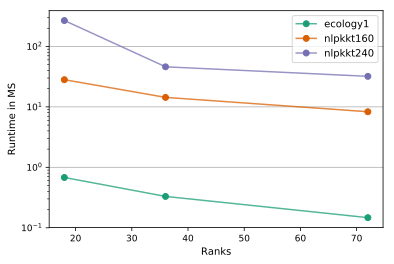

In [17]:
ranks = [18, 36, 72]
pdf = matplotlib.backends.backend_pdf.PdfPages("SpMV_MPI_WoutIPC_Performance_Model.pdf")
data = pd.DataFrame()
matrix_1 = []
matrix_2 = []
matrix_3 = []
runtime = pd.read_csv('MPISpMVComputationResult.csv').groupby('MatrixName')['AvgTime'].mean()

for matrix in matrixs:
    for rank in ranks:
        if matrix == 'ecology1':
            matrix_1.append(runtime[matrix_list[0] + '_' + str(rank)])
        if matrix == 'nlpkkt160':
            matrix_2.append(runtime[matrix_list[1] + '_' + str(rank)])
        if matrix == 'nlpkkt240':
            matrix_3.append(runtime[matrix_list[2] + '_' + str(rank)])
            
data['Ranks'] = ranks
data[matrixs[0]] = matrix_1
data[matrixs[1]] = matrix_2
data[matrixs[2]] = matrix_3

ax = data.plot(kind='line', x='Ranks', marker='o', alpha=0.75, rot=0, fontsize=9, color=color_list1, logy=True, legend=True)
ax.set_xlabel('Ranks')
ax.set_ylabel('Runtime in MS')
ax.yaxis.grid()
ax.legend()
pdf.savefig(bbox_inches = 'tight')
pdf.close()
        

# SpMV With Inter Process Communication

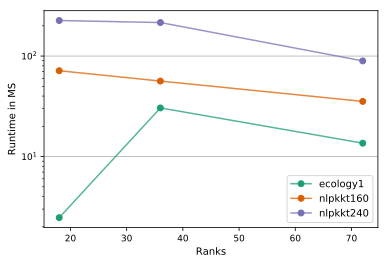

In [18]:
ranks = [18, 36, 72]
pdf = matplotlib.backends.backend_pdf.PdfPages("SpMV_MPI_WIPC_Performance_Model.pdf")
data = pd.DataFrame()
matrix_1 = []
matrix_2 = []
matrix_3 = []
runtime = pd.read_csv('MPISpMVResult.csv').groupby('MatrixName')['AvgTime'].mean()

for matrix in matrixs:
    for rank in ranks:
        if matrix == 'ecology1':
            matrix_1.append(runtime[matrix_list[0] + '_' + str(rank)])
        if matrix == 'nlpkkt160':
            matrix_2.append(runtime[matrix_list[1] + '_' + str(rank)])
        if matrix == 'nlpkkt240':
            matrix_3.append(runtime[matrix_list[2] + '_' + str(rank)])
            
data['Ranks'] = ranks
data[matrixs[0]] = matrix_1
data[matrixs[1]] = matrix_2
data[matrixs[2]] = matrix_3

ax = data.plot(kind='line', x='Ranks', marker='o', alpha=0.75, rot=0, fontsize=9, color=color_list1, logy=True, legend=True)
ax.set_xlabel('Ranks')
ax.set_ylabel('Runtime in MS')
ax.yaxis.grid()
ax.legend()
pdf.savefig(bbox_inches = 'tight')
pdf.close()
        

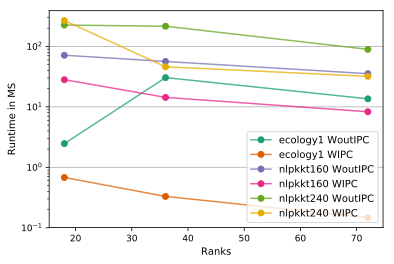

In [20]:
ranks = [18, 36, 72]
pdf = matplotlib.backends.backend_pdf.PdfPages("SpMV_MPI_Performance_Model.pdf")
data = pd.DataFrame()
matrix_1 = []
matrix_2 = []
matrix_3 = []
matrix_1_wipc = []
matrix_2_wipc = []
matrix_3_wipc = []
runtime_woutipc = pd.read_csv('MPISpMVResult.csv').groupby('MatrixName')['AvgTime'].mean()
runtime_wipc = pd.read_csv('MPISpMVComputationResult.csv').groupby('MatrixName')['AvgTime'].mean()

for matrix in matrixs:
    for rank in ranks:
        if matrix == 'ecology1':
            matrix_1.append(runtime_woutipc[matrix_list[0] + '_' + str(rank)])
            matrix_1_wipc.append(runtime_wipc[matrix_list[0] + '_' + str(rank)])
        if matrix == 'nlpkkt160':
            matrix_2.append(runtime_woutipc[matrix_list[1] + '_' + str(rank)])
            matrix_2_wipc.append(runtime_wipc[matrix_list[1] + '_' + str(rank)])
        if matrix == 'nlpkkt240':
            matrix_3.append(runtime_woutipc[matrix_list[2] + '_' + str(rank)])
            matrix_3_wipc.append(runtime_wipc[matrix_list[2] + '_' + str(rank)])
            
data['Ranks'] = ranks
data[matrixs[0] + ' WoutIPC'] = matrix_1
data[matrixs[0] + ' WIPC'] = matrix_1_wipc
data[matrixs[1] + ' WoutIPC'] = matrix_2
data[matrixs[1] + ' WIPC'] = matrix_2_wipc
data[matrixs[2] + ' WoutIPC'] = matrix_3
data[matrixs[2] + ' WIPC'] = matrix_3_wipc

ax = data.plot(kind='line', x='Ranks', marker='o', alpha=0.75, rot=0, fontsize=9, color=color_list1, logy=True, legend=True)
ax.set_xlabel('Ranks')
ax.set_ylabel('Runtime in MS')
ax.yaxis.grid()
ax.legend()
pdf.savefig(bbox_inches = 'tight')
pdf.close()
        

# Pt2Pt Latency for Multi Thread

In [46]:
latency_mt['Size']

8

[4.12326934]
[[0.00000000e+00 6.47993840e-05 1.53274713e-11]]


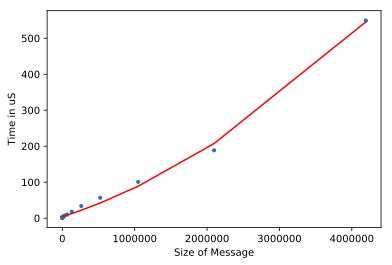

In [135]:
pdf = matplotlib.backends.backend_pdf.PdfPages("pt2pt_latency_mt.pdf")
latency_mt = pd.read_csv('latency_mt.csv')
# ax = latency_mt.plot(kind='line', x='Size', marker='o', alpha=0.75, rot=0, fontsize=9, color=color_list1, logx=True, logy=True, legend=True)
# ax.set_xlabel('Size')
# ax.set_ylabel('Latency in uS')
# ax.yaxis.grid()
# ax.legend()

x = latency_mt['Size'][:, np.newaxis]
y = latency_mt['Latency'][:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

print(model.intercept_)
print(model.coef_)
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='r')
plt.xlabel('Size of Message')
plt.ylabel('Time in uS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()

In [213]:
SpMVCompute = pd.read_csv('MPISpMVComputationResult.csv')
SpMVCompute = SpMVCompute.sort_values(by=['nProcess', 'NonZeroPerRow', 'MatrixSize', 'NonZeroPerBlock',])
SpMVCompute_16 = SpMVCompute[SpMVCompute['nProcess'] == 16]
SpMVCompute_32 = SpMVCompute[SpMVCompute['nProcess'] == 32]
SpMVCompute_64 = SpMVCompute[SpMVCompute['nProcess'] == 64]
SpMVCompute_128 = SpMVCompute[SpMVCompute['nProcess'] == 128]

,MatrixSize,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock
50,16384,0.033,0.634,0.384,1000,128,2,256
26,262144,0.068,1.532,0.901,1000,128,2,4096
34,4194304,15.839,49.970,41.248,1000,128,2,65536
35,8388608,3.830,4.237,4.060,1000,128,2,131072
46,8192,0.052,0.738,0.458,1000,128,4,256
51,16384,0.034,1.063,0.733,1000,128,4,512
27,262144,0.090,0.844,0.472,1000,128,4,8192
36,8388608,5.119,5.849,5.533,1000,128,4,262144
47,8192,0.001,0.776,0.489,1000,128,8,512
52,16384,0.059,0.626,0.404,1000,128,8,1024


[0.19539901]
[[ 0.00000000e+00  2.79961439e-06 -8.50934677e-15]]


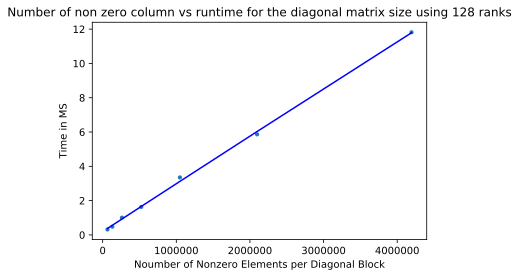

In [290]:
pdf = matplotlib.backends.backend_pdf.PdfPages("Coordinate_SpMV_NNZ_vs_Time.pdf")
SpMVCompute = pd.read_csv('MPISpMVComputationResult.csv')
SpMVCompute = SpMVCompute.sort_values(by=['NonZeroPerBlock'])
SpMVCompute_128 = SpMVCompute[SpMVCompute['nProcess'] == 128]
SpMVCompute_128 = SpMVCompute_128.reset_index(drop=True)
SpMVCompute_128 = SpMVCompute_128.groupby('NonZeroPerBlock').mean()
SpMVCompute_128 = SpMVCompute_128.reset_index()

# Model the results
x_128 = SpMVCompute_128['NonZeroPerBlock'][:, np.newaxis]
y_128 = SpMVCompute_128['AvgTime'][:, np.newaxis]
polynomial_features= PolynomialFeatures(degree=2)
x_poly_128 = polynomial_features.fit_transform(x_128)

# Initialize Model
model_128 = LinearRegression()
model_128.fit(x_poly_128, y_128)

print(model_128.intercept_)
print(model_128.coef_)

# Predict
y_poly_pred_128 = model_128.predict(x_poly_128)
#plots the predicted results
f = plt.figure()
plt.scatter(x_128, y_128, s=10)
plt.plot(x_128, y_poly_pred_128, color='b')
# plt.xscale('log')
plt.xlabel('Noumber of Nonzero Elements per Diagonal Block')
plt.ylabel('Time in MS')
plt.title('Number of non zero column vs runtime for the diagonal matrix size using 128 ranks')
plt.show()
pdf.savefig(f)

pdf.close()

In [266]:
csrSpMV = pd.read_csv('CSR_MPI_SpMV.csv')
csrSpMV = csrSpMV.sort_values(by=['MatrixSize', 'NonZeroPerBlock'])
csrSpMV_128 = csrSpMV[csrSpMV['nProcess'] == 128]

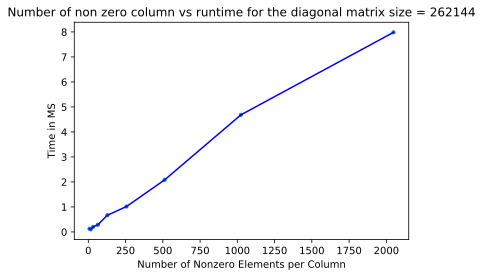

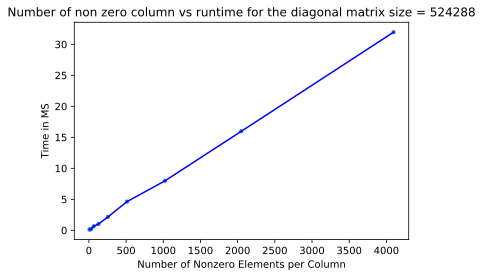

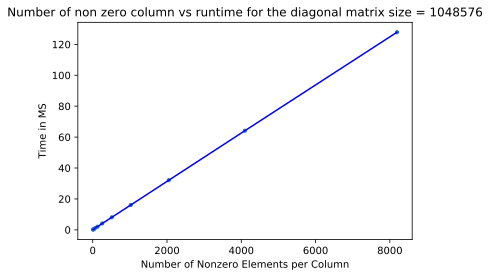

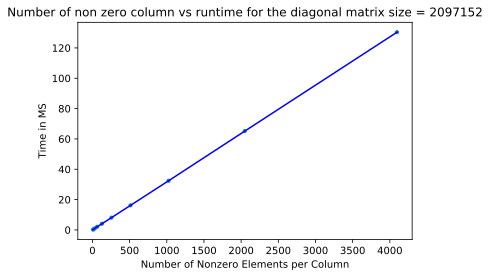

In [291]:
pdf = matplotlib.backends.backend_pdf.PdfPages("CSR_MPI_SpMV_NNZ_vs_Time.pdf")
csrSpMV = pd.read_csv('CSR_MPI_SpMV.csv')
csrSpMV = csrSpMV.sort_values(by=['MatrixSize', 'NonZeroPerBlock'])
csrSpMV_128 = csrSpMV[csrSpMV['nProcess'] == 128]
csrSpMV_128 = csrSpMV_128.reset_index(drop=True)
csrSpMV_262144 = csrSpMV_128[csrSpMV_128['MatrixSize'] == 262144]
csrSpMV_262144 = csrSpMV_262144.groupby('NonZeroPerRow').mean()
csrSpMV_262144 = csrSpMV_262144.reset_index()
x_262144_r = csrSpMV_262144['NonZeroPerRow'][:, np.newaxis]
# x_262144_b = csrSpMV_262144['NonZeroPerBlock'][:, np.newaxis]
y_262144 = csrSpMV_262144['AvgTime'][:, np.newaxis]

csrSpMV_524288 = csrSpMV_128[csrSpMV_128['MatrixSize'] == 524288]
csrSpMV_524288 = csrSpMV_524288.groupby('NonZeroPerRow').mean()
csrSpMV_524288 = csrSpMV_524288.reset_index()
x_524288_r = csrSpMV_524288['NonZeroPerRow'][:, np.newaxis]
y_524288 = csrSpMV_524288['AvgTime'][:, np.newaxis]

csrSpMV_1048576 = csrSpMV_128[csrSpMV_128['MatrixSize'] == 1048576]
csrSpMV_1048576 = csrSpMV_1048576.groupby('NonZeroPerRow').mean()
csrSpMV_1048576 = csrSpMV_1048576.reset_index()
x_1048576_r = csrSpMV_1048576['NonZeroPerRow'][:, np.newaxis]
y_1048576 = csrSpMV_1048576['AvgTime'][:, np.newaxis]

csrSpMV_2097152 = csrSpMV_128[csrSpMV_128['MatrixSize'] == 2097152]
csrSpMV_2097152 = csrSpMV_2097152.groupby('NonZeroPerRow').mean()
csrSpMV_2097152 = csrSpMV_2097152.reset_index()
x_2097152_r = csrSpMV_2097152['NonZeroPerRow'][:, np.newaxis]
y_2097152 = csrSpMV_2097152['AvgTime'][:, np.newaxis]

f = plt.figure()
plt.scatter(x_262144_r, y_262144, s=10)
plt.plot(x_262144_r, y_262144, color='b')
# plt.xscale('log')
plt.xlabel('Number of Nonzero Elements per Column')
plt.ylabel('Time in MS')
plt.title('Number of non zero column vs runtime for the diagonal matrix size = 262144')
plt.show()
pdf.savefig(f)

f = plt.figure()
plt.scatter(x_524288_r, y_524288, s=10)
plt.plot(x_524288_r, y_524288, color='b')
# plt.xscale('log')
plt.xlabel('Number of Nonzero Elements per Column')
plt.ylabel('Time in MS')
plt.title('Number of non zero column vs runtime for the diagonal matrix size = 524288')
plt.show()
pdf.savefig(f)

f = plt.figure()
plt.scatter(x_1048576_r, y_1048576, s=10)
plt.plot(x_1048576_r, y_1048576, color='b')
# plt.xscale('log')
plt.xlabel('Number of Nonzero Elements per Column')
plt.ylabel('Time in MS')
plt.title('Number of non zero column vs runtime for the diagonal matrix size = 1048576')
plt.show()
pdf.savefig(f)

f = plt.figure()
plt.scatter(x_2097152_r, y_2097152, s=10)
plt.plot(x_2097152_r, y_2097152, color='b')
# plt.xscale('log')
plt.xlabel('Number of Nonzero Elements per Column')
plt.ylabel('Time in MS')
plt.title('Number of non zero column vs runtime for the diagonal matrix size = 2097152')
plt.show()
pdf.savefig(f)
# f.savefig("CSR_MPI_SpMV_NNZ_vs_Time.pdf", bbox_inches='tight')

pdf.close()
# csrSpMV_262144

In [312]:
csrModel = pd.read_csv('CSR_SpMV_Model.csv')
predictedRuntime = []
for index,row in csrModel.iterrows():
     predictedRuntime.append(0.07509696 + (0.01561199*row['NonZeroPerRow']))
csrModel['PredictedRunTime'] = predictedRuntime
csrModel

,MatrixSize,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock,Sparsity,PredictedRunTime
0,4000,0.371,0.371,0.371,1000,4,70,70000,2,1.167936
1,4000,0.742,0.753,0.750,1000,4,70,70000,2,1.167936
2,262144,47.870,48.018,47.964,1000,128,64,131072,2,1.074264
3,262144,97.345,97.448,97.396,1000,128,1024,2097152,2,16.061775
4,262144,70.861,70.961,70.916,1000,128,512,1048576,2,8.068436
5,262144,89.672,89.813,89.746,1000,128,256,524288,2,4.071766
6,262144,66.675,66.794,66.731,1000,128,128,262144,2,2.073432
7,262144,60.707,60.871,60.812,1000,128,64,131072,2,1.074264
8,262144,1.976,2.061,2.033,1000,128,32,65536,2,0.574681
9,262144,0.979,1.066,1.028,1000,128,16,32768,2,0.324889


In [299]:
x_262144_r

array([[   8],
       [  16],
       [  32],
       [  64],
       [ 128],
       [ 256],
       [ 512],
       [1024],
       [2048]])

In [302]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly_262144 = polynomial_features.fit_transform(x_262144_r)
x_poly_262144

array([[1.000e+00, 8.000e+00],
       [1.000e+00, 1.600e+01],
       [1.000e+00, 3.200e+01],
       [1.000e+00, 6.400e+01],
       [1.000e+00, 1.280e+02],
       [1.000e+00, 2.560e+02],
       [1.000e+00, 5.120e+02],
       [1.000e+00, 1.024e+03],
       [1.000e+00, 2.048e+03]])

In [305]:
y_262144

array([[0.129],
       [0.1  ],
       [0.2  ],
       [0.286],
       [0.669],
       [1.016],
       [2.082],
       [4.684],
       [7.984]])

In [306]:
y_poly_pred_262144

array([[0.13802441],
       [0.16971321],
       [0.23309082],
       [0.35984605],
       [0.61335649],
       [1.12037738],
       [2.13441915],
       [4.1625027 ],
       [8.21866979]])

1) intercept:  [0.1063356]
1) Coef:  [[0.        0.0039611]]
2) intercept:  [0.12155438]
2) Coef:  [[0.         0.00777278]]
3) intercept:  [0.07509696]
3) Coef:  [[0.         0.01561199]]
4) intercept:  [-0.02449979]
4) Coef:  [[0.         0.03182331]]


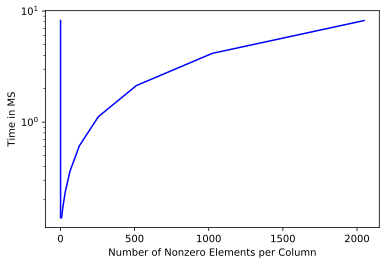

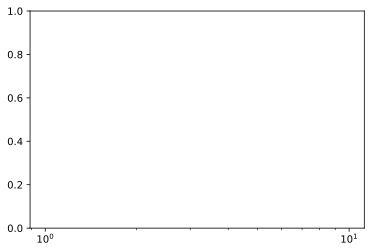

In [310]:
polynomial_features= PolynomialFeatures(degree=1)
x_poly_262144 = polynomial_features.fit_transform(x_262144_r)
x_poly_524288 = polynomial_features.fit_transform(x_524288_r)
x_poly_1048576 = polynomial_features.fit_transform(x_1048576_r)
x_poly_2097152 = polynomial_features.fit_transform(x_2097152_r)

model1 = LinearRegression()
model1.fit(x_poly_262144, y_262144)
print('1) intercept: ', model1.intercept_)
print('1) Coef: ', model1.coef_)

model2 = LinearRegression()
model2.fit(x_poly_524288, y_524288)
print('2) intercept: ', model2.intercept_)
print('2) Coef: ', model2.coef_)

model3 = LinearRegression()
model3.fit(x_poly_1048576, y_1048576)
print('3) intercept: ', model3.intercept_)
print('3) Coef: ', model3.coef_)

model4 = LinearRegression()
model4.fit(x_poly_2097152, y_2097152)
print('4) intercept: ', model4.intercept_)
print('4) Coef: ', model4.coef_)

y_poly_pred_262144 = model.predict(x_poly_262144)
# y_poly_pred_524288 = model.predict(x_poly_524288)
# y_poly_pred_1048576 = model.predict(x_poly_1048576)
# y_poly_pred_2097152 = model.predict(x_poly_2097152)


# f = plt.figure()
# plt.scatter(x_262144_r, y_262144, s=10)
plt.plot(x_poly_262144, y_poly_pred_262144, color='b')
plt.yscale('log')
plt.xlabel('Number of Nonzero Elements per Column')
plt.ylabel('Time in MS')
# plt.title('Number of non zero column vs runtime for the diagonal matrix size = 262144')
plt.show()
# pdf.savefig(f)

# f = plt.figure()
# plt.scatter(x_524288_r, y_524288, s=10)
# plt.plot(x_poly_524288, y_poly_pred_524288, color='b')
plt.xscale('log')
# plt.xlabel('Number of Nonzero Elements per Column')
# plt.ylabel('Time in MS')
# plt.title('Number of non zero column vs runtime for the diagonal matrix size = 524288')
# plt.show()
# pdf.savefig(f)

# f = plt.figure()
# plt.scatter(x_1048576_r, y_1048576, s=10)
# plt.plot(x_poly_1048576, y_poly_pred_1048576, color='b')
# plt.xscale('log')
# plt.xlabel('Number of Nonzero Elements per Column')
# plt.ylabel('Time in MS')
# plt.title('Number of non zero column vs runtime for the diagonal matrix size = 1048576')
# plt.show()
# pdf.savefig(f)

# f = plt.figure()
# plt.scatter(x_2097152_r, y_2097152, s=10)
# plt.plot(x_poly_2097152, y_poly_pred_2097152, color='b')
# plt.xscale('log')
# plt.xlabel('Number of Nonzero Elements per Column')
# plt.ylabel('Time in MS')
# plt.title('Number of non zero column vs runtime for the diagonal matrix size = 2097152')
# plt.show()
# pdf.savefig(f)

In [275]:
pdf = matplotlib.backends.backend_pdf.PdfPages("SpMV_Computational_Time_vs_Non_Diagoanl_Col.pdf")
SpMVCompute = pd.read_csv('MPISpMVComputationResult.csv')
# SpMVCompute = SpMVCompute.sort_values(by=['AvgOnDiagonalColumn'])
SpMVCompute = SpMVCompute.sort_values(by=['nProcess', 'AvgOnDiagonalColumn'])
SpMVCompute_16 = SpMVCompute[SpMVCompute['nProcess'] == 16]
SpMVCompute_16 = SpMVCompute_16.reset_index(drop=True)
SpMVCompute_32 = SpMVCompute[SpMVCompute['nProcess'] == 32]
SpMVCompute_32 = SpMVCompute_32.reset_index(drop=True)
SpMVCompute_64 = SpMVCompute[SpMVCompute['nProcess'] == 64]
SpMVCompute_64 = SpMVCompute_64.reset_index(drop=True)
SpMVCompute_128 = SpMVCompute[SpMVCompute['nProcess'] == 128]
SpMVCompute_128 = SpMVCompute_128.reset_index(drop=True)


x_16 = SpMVCompute_16['AvgOnDiagonalColumn'][:, np.newaxis]

x_32 = SpMVCompute_32['AvgOnDiagonalColumn'][:, np.newaxis]

x_64 = SpMVCompute_64['AvgOnDiagonalColumn'][:, np.newaxis]

x_128 = SpMVCompute_128['AvgOnDiagonalColumn'][:, np.newaxis]

# for index,row in SpMVCompute_16.iterrows():
#     x_16[index] = x_16[index]/(row['MatrixSize']/row['nProcess'])
# for index,row in SpMVCompute_32.iterrows():
#     x_32[index] = x_32[index]/(row['MatrixSize']/row['nProcess'])
# for index,row in SpMVCompute_64.iterrows():
#     x_64[index] = x_64[index]/(row['MatrixSize']/row['nProcess'])
# for index,row in SpMVCompute_128.iterrows():
#     x_128[index] = x_128[index]/(row['MatrixSize']/row['nProcess'])

y_16 = SpMVCompute_16['AvgTime'][:, np.newaxis]
y_32 = SpMVCompute_32['AvgTime'][:, np.newaxis]
y_64 = SpMVCompute_64['AvgTime'][:, np.newaxis]
y_128 = SpMVCompute_128['AvgTime'][:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly_16 = polynomial_features.fit_transform(x_16)
x_poly_32 = polynomial_features.fit_transform(x_32)
x_poly_64 = polynomial_features.fit_transform(x_64)
x_poly_128 = polynomial_features.fit_transform(x_128)

model_16 = LinearRegression()
model_16.fit(x_poly_16, y_16)
model_32 = LinearRegression()
model_32.fit(x_poly_32, y_32)
model_64 = LinearRegression()
model_64.fit(x_poly_64, y_64)
model_128 = LinearRegression()
model_128.fit(x_poly_128, y_128)

y_poly_pred_16 = model_128.predict(x_poly_16)
y_poly_pred_32 = model_128.predict(x_poly_32)
y_poly_pred_64 = model_128.predict(x_poly_64)
y_poly_pred_128 = model_128.predict(x_poly_128)

print(model_128.intercept_)
print(model_128.coef_)
plt.scatter(x_16, y_16, s=10)
plt.scatter(x_32, y_32, s=10)
plt.scatter(x_64, y_64, s=10)
plt.scatter(x_128, y_128, s=10)
plt.plot(x_16, y_poly_pred_16, color='r')
plt.plot(x_32, y_poly_pred_32, color='c')
plt.plot(x_64, y_poly_pred_64, color='g')
plt.plot(x_128, y_poly_pred_128, color='b')
plt.xlabel('No. of Nonzero Diagonal Column')
plt.ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()

KeyError: 'AvgOnDiagonalColumn'

In [287]:
SpMVCompute

,MatrixSize,MinTime,MaxTime,AvgTime,TotalRun,nProcess,NonZeroPerRow,NonZeroPerBlock
0,32768,0.462,0.538,0.517,1000,128,256,65536
7,32768,0.169,0.241,0.215,1000,128,256,65536
14,32768,0.169,0.224,0.198,1000,128,256,65536
21,32768,0.169,0.249,0.227,1000,128,256,65536
28,32768,0.379,0.454,0.426,1000,128,256,65536
1,65536,0.339,0.466,0.443,1000,128,256,131072
8,65536,0.340,0.416,0.396,1000,128,256,131072
15,65536,0.342,0.403,0.380,1000,128,256,131072
22,65536,0.341,0.405,0.379,1000,128,256,131072
29,65536,0.751,0.828,0.802,1000,128,256,131072


In [286]:
pdf = matplotlib.backends.backend_pdf.PdfPages("SpMV_Computational_Time_vs_Non_Diagoanl_Col.pdf")
SpMVCompute = pd.read_csv('MPISpMVComputationResult.csv')
# SpMVCompute = SpMVCompute.sort_values(by=['AvgOnDiagonalColumn'])
SpMVCompute = SpMVCompute.sort_values(by=['nProcess', 'NonZeroPerBlock'])
SpMVCompute_16 = SpMVCompute[SpMVCompute['nProcess'] == 16]
SpMVCompute_16 = SpMVCompute_16.reset_index(drop=True)


x_16 = SpMVCompute_16['NonZeroPerBlock'][:, np.newaxis]
y_16 = SpMVCompute_16['AvgTime'][:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3)
x_poly_16 = polynomial_features.fit_transform(x_16)

model_16 = LinearRegression()
model_16.fit(x_poly_16, y_16)

y_poly_pred_16 = model_16.predict(x_poly_16)

print(model_16.intercept_)
print(model_16.coef_)
plt.scatter(x_16, y_16, s=10)
plt.plot(x_16, y_poly_pred_16, color='b')
plt.xscale('log')
plt.xlabel('No. of Nonzero Diagonal Column')
plt.ylabel('Time in MS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

Text(0,0.5,'Time in MS')

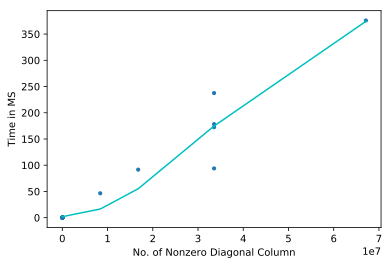

In [192]:
# y_poly_pred_32 = model_16.predict(x_poly_32)
y_poly_pred_32 = model_32.predict(x_poly_32)
# y_poly_pred_32 = model_64.predict(x_poly_32)
# y_poly_pred_32 = model_128.predict(x_poly_32)
plt.scatter(x_32, y_32, s=10)
plt.plot(x_32, y_poly_pred_32, color='c')
plt.xlabel('No. of Nonzero Diagonal Column')
plt.ylabel('Time in MS')

Text(0,0.5,'Time in MS')

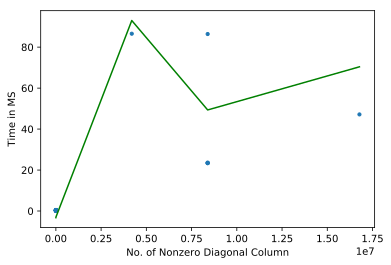

In [193]:
# y_poly_pred_64 = model_16.predict(x_poly_64)
# y_poly_pred_64 = model_32.predict(x_poly_64)
y_poly_pred_64 = model_64.predict(x_poly_64)
# y_poly_pred_64 = model_128.predict(x_poly_64)
plt.scatter(x_64, y_64, s=10)
plt.plot(x_64, y_poly_pred_64, color='g')
plt.xlabel('No. of Nonzero Diagonal Column')
plt.ylabel('Time in MS')

Text(0,0.5,'Time in MS')

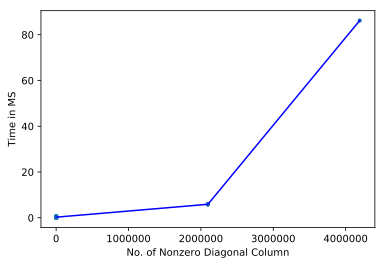

In [194]:
# y_poly_pred_128 = model_16.predict(x_poly_128)
# y_poly_pred_128 = model_32.predict(x_poly_128)
# y_poly_pred_128 = model_64.predict(x_poly_128)
y_poly_pred_128 = model_128.predict(x_poly_128)
plt.scatter(x_128, y_128, s=10)
plt.plot(x_128, y_poly_pred_128, color='b')
plt.xlabel('No. of Nonzero Diagonal Column')
plt.ylabel('Time in MS')

In [140]:
SpMV

,MatrixName,MinTime,MaxTime,AvgTime,TotalRun,nProcess,AvgSendRequests,AvgDataRequests,PerRankDataRequests,SizeOfMsg,MaxNonZero,MinNonZero,AvgNonZero,MinRequests,MaxRequests,AvgRequests
6,input/ecology1,54.873,56.064,55.496,100,72,5,468,5320,8,55696,55222,55500,2,8,5
3,input/ecology1,2.203,2.203,2.203,100,36,4,650,4640,8,111298,110595,111000,2,7,4
1,input/ecology1,2.797,2.797,2.797,100,18,4,815,12736,8,222372,221605,222000,2,7,4
5,input/nlpkkt160,124.744,125.704,125.332,100,72,9,20431,74560,8,3223638,2937544,3071840,4,18,9
4,input/nlpkkt160,105.919,106.114,106.015,100,36,8,30119,244544,8,6447276,5936940,6143680,4,17,8
8,input/nlpkkt240,497.971,499.425,498.980,100,72,9,46057,361080,8,10702260,10090914,10367760,4,17,9
0,input/nlpkkt160,73.853,73.859,73.856,100,18,7,43426,255000,8,12577962,12042820,12287361,4,13,7
2,input/nlpkkt240,123.531,123.540,123.535,100,36,8,68002,486360,8,21207204,20381208,20735520,4,17,8
7,input/nlpkkt240,229.923,230.038,229.938,100,18,7,98638,983088,8,41954568,41089474,41471041,4,13,7


[[ 4.46843587]
 [ 4.42426848]
 [ 4.9510405 ]
 [ 9.03991979]
 [20.88617978]
 [29.51940771]
 [21.64378108]
 [39.26475053]
 [82.64018499]]


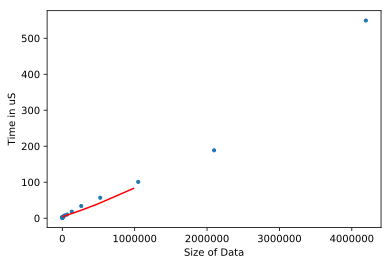

In [139]:
pdf = matplotlib.backends.backend_pdf.PdfPages("Inter_rank_communication_vs_time.pdf")
SpMV = pd.read_csv('MPISpMVResult.csv')
SpMV = SpMV.sort_values(by=['AvgNonZero'])
test_x = SpMV['PerRankDataRequests'][:, np.newaxis]
for index,row in SpMV.iterrows():
    test_x[index] = test_x[index]*row['SizeOfMsg']*row['AvgSendRequests']
x_poly_test = polynomial_features.fit_transform(test_x)
y_poly_pred = model.predict(x_poly_test)
print(y_poly_pred)
plt.scatter(x, y, s=10)
plt.plot(test_x, y_poly_pred, color='r')
plt.xlabel('Size of Data')
plt.ylabel('Time in uS')
pdf.savefig(bbox_inches = 'tight')
pdf.close()

[[ 4.53653337]
 [ 4.42426848]
 [ 4.36972833]
 [29.21012032]
 [20.88617978]
 [15.42538142]
 [44.87690544]
 [62.63163751]
 [29.51940771]]


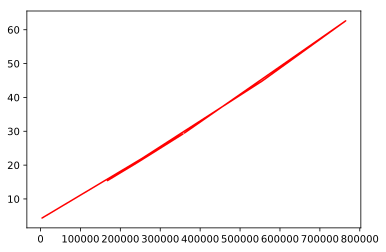

In [106]:
SpMV = pd.read_csv('MPISpMVResult.csv')
test_x = SpMV['PerRankDataRequests'][:, np.newaxis]
for index,row in SpMV.iterrows():
    test_x[index] = test_x[index]*row['SizeOfMsg']*row['AvgSendRequests']
x_poly_test = polynomial_features.fit_transform(test_x)
y_poly_pred = model.predict(x_poly_test)
print(y_poly_pred)
# plt.scatter(x, y, s=10)
plt.plot(test_x, y_poly_pred, color='r')

# pt2pt Latency 

[1.2435182]
[[ 0.00000000e+00  1.34900734e-04 -2.81105380e-13]]


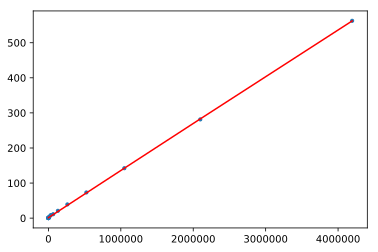

In [61]:
pdf = matplotlib.backends.backend_pdf.PdfPages("pt2pt_latency.pdf")
latency = pd.read_csv('latency.csv')
# ax = latency_mt.plot(kind='line', x='Size', marker='o', alpha=0.75, rot=0, fontsize=9, color=color_list1, logx=True, logy=True, legend=True)
# ax.set_xlabel('Size')
# ax.set_ylabel('Latency in uS')
# ax.yaxis.grid()
# ax.legend()
x = latency['Size'][:, np.newaxis]
y = latency['Latency'][:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

print(model.intercept_)
print(model.coef_)
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='r')
pdf.savefig(bbox_inches = 'tight')
pdf.close()

[-0.19038821]
[[ 0.00000000e+00  3.91294448e-06 -7.39670589e-15]]


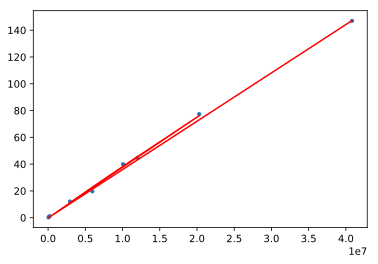

In [69]:
ranks = [18, 36, 72]
data = pd.DataFrame()
latency = []
size = []
runtime = pd.read_csv('MPISpMVComputationResult.csv')

for index, row in runtime.iterrows():
    latency.append(row['AvgTime'])
    size.append(row['AvgOnDiagonalColumn'])
x = runtime['AvgOnDiagonalColumn'][:, np.newaxis]
y = runtime['AvgTime'][:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

print(model.intercept_)
print(model.coef_)
plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='r')          
        